In [1]:
import matplotlib
matplotlib.use('qtagg')
#%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2

import nest_asyncio
%config Completer.use_jedi = False

#
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#
import sys

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

#from utils_steffen import *
from tqdm import trange, tqdm

#
import sys, os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from utils.treadmill import treadmill


Autosaving every 180 seconds


<ipython-input-1-d5290c1c5694>:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
###################################################
######## 2D/3D PLOTS: PCA VS. ... ###########
###################################################

#
experiment_id = 0      # the default mouse is 4366; and has 3 sessions: 20210228, 20210301, 20210303
session_ids = [0,1,2]
session_names = ["A","Blank","A'"]
up_phase = True
reorder = False  # doesn't do anything now; imgs is NOT ordered by defaults

#
tr = treadmill.Treadmill(experiment_id, 
                         session_ids,
                         up_phase,
                         reorder,
                         session_names)

#
tr.show_cell_session_averages()


Segment order:  ['A', 'B', "A'"]
raw ca:  (1027, 92900)
   Data binned using  5  frame bins, final size:   (7431,)
   Data binned using  5  frame bins, final size:   (7431,)
   Data binned using  5  frame bins, final size:   (3715,)
   Data binned using  5  frame bins, final size:   (3715,)
   Data binned using  5  frame bins, final size:   (7431,)
   Data binned using  5  frame bins, final size:   (7431,)
total # segments pos_tracks:  3

pos track:  [0 0 0 ... 6 6 6] (7431,)  , # unique vals:  (180,)
idx track:  [    2     7    12 ... 37142 37147 37152] (7431,)
/media/cat/4TB/donato/steffen/DON-004366/20210228/suite2p/plane0/mat/DON-004366_20210228_TRD-2P_S1-ACQ_eval.mat
fname ca:  /media/cat/4TB/donato/steffen/DON-004366/20210228/suite2p/plane0/binarized_traces/F_upphase.npy
ca shape:  (1027, 92900)
sement order:  ['A', 'B', "A'"]


100%|██████████| 1027/1027 [00:02<00:00, 484.40it/s]


maxes:  (1027,) [  5  11   7 ...   0   3 169]
1.0 0.0
DONE...

pos track:  [ 30  31  32 ... 179 179 179] (3715,)  , # unique vals:  (180,)
idx track:  [37162 37167 37172 ... 55722 55727 55732] (3715,)
/media/cat/4TB/donato/steffen/DON-004366/20210228/suite2p/plane0/mat/DON-004366_20210228_TRD-2P_S2-ACQ_eval.mat
fname ca:  /media/cat/4TB/donato/steffen/DON-004366/20210228/suite2p/plane0/binarized_traces/F_upphase.npy
ca shape:  (1027, 92900)
sement order:  ['A', 'B', "A'"]


100%|██████████| 1027/1027 [00:01<00:00, 945.95it/s]


maxes:  (1027,) [ 8  8  8 ...  0 56  7]
1.0 0.0
DONE...

pos track:  [  0   0   0 ... 140 144 148] (7431,)  , # unique vals:  (180,)
idx track:  [55742 55747 55752 ... 92882 92887 92892] (7431,)
/media/cat/4TB/donato/steffen/DON-004366/20210228/suite2p/plane0/mat/DON-004366_20210228_TRD-2P_S3-ACQ_eval.mat
fname ca:  /media/cat/4TB/donato/steffen/DON-004366/20210228/suite2p/plane0/binarized_traces/F_upphase.npy
ca shape:  (1027, 92900)
sement order:  ['A', 'B', "A'"]


100%|██████████| 1027/1027 [00:02<00:00, 479.86it/s]

maxes:  (1027,) [121  11   8 ...   5 172 172]
1.0 0.0
DONE...


In [4]:
###################################################   
################ COMPUTE RATE MAPS ################
###################################################

#   
tr.reorder_for_vis=True
tr.normalize = False    # can't normalize for spatial information!!
tr.min_vel = 2  #
tr.session_ids = [0,1,2]
tr.compute_rate_maps()

#



3 7430
# moving times:  (5353,)
rate maps:  (1027, 180)
3 7430
# moving times:  (3189,)
rate maps:  (1027, 180)
3 7430
# moving times:  (4707,)
rate maps:  (1027, 180)


In [8]:
# show the rate map for 1 cell

plt.figure()
print (tr.rate_maps[0].shape)
plt.plot(tr.rate_maps[0][:1].T/tr.n_frames_in_loc[0][:,None])

plt.show(block=False)

(1027, 180)


In [9]:
# COMPUTE SPATIAL INFORMATOIN

#
tr.n_tests = 500
tr.compute_si()
        
print ("DONE...")

time_map : (5353,)


  0%|          | 4/1027 [00:00<00:29, 34.85it/s]/home/cat/code/donatolab/utils/treadmill/treadmill.py:819: RuntimeWarning: invalid value encountered in double_scalars
  selectivity = max_rate / mean_rate
/home/cat/code/donatolab/utils/treadmill/treadmill.py:821: RuntimeWarning: invalid value encountered in divide
  log_argument = rate_map / mean_rate
/home/cat/code/donatolab/utils/treadmill/treadmill.py:336: UserWarning: Warning: converting a masked element to nan.
  self.si_rate[session_id, c] = inf_rate
/home/cat/code/donatolab/utils/treadmill/treadmill.py:337: UserWarning: Warning: converting a masked element to nan.
  self.si[session_id, c] = inf_content
/home/cat/code/donatolab/utils/treadmill/treadmill.py:841: RuntimeWarning: invalid value encountered in divide
  log_argument = rate_map / mean_rate
 80%|███████▉  | 820/1027 [00:22<00:05, 37.61it/s]/home/cat/code/donatolab/utils/treadmill/treadmill.py:841: RuntimeWarning: divide by zero encountered in divide
  log_argument = rate_

time_map : (3189,)


100%|██████████| 1027/1027 [00:22<00:00, 45.09it/s]


time_map : (4707,)


100%|██████████| 1027/1027 [00:26<00:00, 38.90it/s]

DONE...


In [15]:
####################################################################
########## COMPUTE ZSCORE HISTOGRAMS AND SHOW SOME EXAMPLES ########
####################################################################

#
tr.std_threshold = 2.5
tr.session_id = 0
tr.zscore_si_histogram()

#
tr.show_zscore_examples()

# print cell ids greater than threshold:
print (tr.cell_ids_above_threshold)


[   1    9   10   15   17   25   29   35   37   38   44   45   51   57
   65   66   68   73   75   83   84   85   95   97  100  105  107  111
  115  123  127  145  146  156  168  175  176  184  191  198  201  219
  224  228  232  236  240  273  276  277  284  288  291  299  300  311
  321  322  324  325  328  332  334  337  341  351  352  353  361  375
  404  406  409  417  418  420  421  422  428  439  443  444  447  449
  453  466  471  489  490  492  499  500  504  512  514  515  523  524
  526  531  542  545  550  554  556  564  565  571  573  581  585  588
  589  590  591  593  604  608  617  621  625  629  630  635  636  640
  645  657  662  664  665  667  671  672  673  679  681  683  695  698
  699  703  707  714  720  721  722  742  749  755  765  769  771  784
  789  797  811  812  817  820  823  829  830  832  844  845  848  849
  851  856  863  864  869  870  874  876  879  880  883  884  885  889
  890  896  897  900  901  903  911  916  930  932  934  943  951  953
  956 

In [12]:
#################################################################
############### COMPUTE PAIRWISE CORRELATIONS ###################
#################################################################

#
tr.std_threshold = 2.5
tr.session_id = 0

#
tr.show_rigid_cells_from_correlations()



(219,)
(219, 180)
(219, 180)
idx:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 26 27 28 29 30 31 32 33 34 35
 36 37 38]
[  1   2   3   4   5   6   7   9  10  11  12  13  14  17  19  20  22  24
  25  26  28  29  32  33  34  35  37  43  44  47  48  50  55  61  62  63
  64  65  67  68  71  72  73  74  75  77  78  82  83  87  90  93 107 115
 116 118 119 123 127 133 148 156 159 164 172 179 183 204 211]


/home/cat/.conda/envs/donato/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [13]:
#################################################################
############### SHOW CIRCULAR PLOTS FOR ALL CELLS ###############
#################################################################

#
tr.std_threshold = 2.5
tr.pval_threshold = 0.01
tr.corr_threshold = 0.
tr.session_ids = [0,2]
tr.shuffle = True
tr.unscramble = False
tr.get_cell_peak_shifts2()

#
tr.width = 10
tr.make_circular_plots2()





# of cells selected:  (219,)
# of cells with canges:  (36,)
self.changes:  [  94  -19  -87   87   16  -92 -115   12   72  -17  125  -90   19  -62
  -19  157   35    3  107   -4   27   88 -138  114   65  159   65    0
   98    7 -138  -15  -26   80   71    1]
changes2:  [  94  -19  -87   87   16  -92 -115   12   72  -17  125  -90   19  -62
  -19  157   35    3  107   -4   27   88 -138  114   65  159   65    0
   98    7 -138  -15  -26   80   71    1]


In [18]:
#################################################################
############### COMPUTE PAIRWISE CORRELATIONS ###################
#################################################################

# compute pairwise correlations and look at the distribution
from scipy import stats

from utils_steffen import compute_pairse_correlation_distributions
#
#

names = ["A","B","A'"]
pval_thresh = 0.001
corr_thresh = 0.0
offset = 30             # exclude first 20cm for example
unscramble = False      # i
scramble_order = np.array([1, 6, 4, 2, 3, 5])-1
session_ids = [0,2]

#
plt.figure()
for shuffle in [True, False]:
    corrs,_,_,_,_ = compute_pairse_correlation_distributions(imgs,
                                                              session_ids,
                                                              offset,
                                                              unscramble,
                                                              pval_thresh,
                                                              corr_thresh,
                                                              scramble_order,
                                                              shuffle)
    #
    y = np.histogram(corrs, bins = np.arange(-1,1.1,0.05))
    plt.plot(y[1][:-1],y[0],label="shuffled: "+str(shuffle))
    plt.xlabel("pearson cor value")
    plt.ylabel("# of cells ")
    plt.suptitle(names[session_ids[0]] +  " vs " + names[session_ids[1]]+ " , # cells: "+str(len(corrs)))
    plt.xlim(-1,1)
    plt.show(block=False)
    
    # #
    # plot_corr_distributions(corrs, 
    #                         pval_thresh, 
    #                         session_ids,
    #                         names,
    #                        shuffle)
 
plt.legend()
plt.show(block=False)

In [41]:
#########################################################################
############ SHOW SCATTER PLOTS OF PAIR-WISE CORRELATIONS ###############
#########################################################################
from utils_steffen import show_scatter_plots
#
names = ["A","B","A'"]
pval_thresh = 0.01
corr_thresh = 0.3
offset = 30             # exclude first 20cm for example
unscramble = False      # i
scramble_order = np.array([1, 6, 4, 2, 3, 5])-1
session_ids = [0,1]
shuffle=False

#
show_scatter_plots(imgs, 
                  session_ids,
                  offset,
                  unscramble,
                  pval_thresh,
                  corr_thresh,
                  shuffle,
                  names)

In [48]:
############################################
######### CIRCULAR PLOT HISTOGRAMS #########
############################################
from utils_steffen import make_circular_plots

names = ["A","B","A'"]
pval_thresh = 0.01
corr_thresh = 0.5
offset = 30             # exclude first 20cm for example
unscramble = False      # i
scramble_order = np.array([1, 6, 4, 2, 3, 5])-1
session_ids = [0,2]
shuffle=False

### SHUFFLE CONDITION ###
if shuffle==True:
    changes_array = []
    for k in trange(100):
        #print (k)
        corrs, locs, peaks, changes, stacks = compute_pairse_correlation_distributions(imgs,
                                                                              session_ids,
                                                                              offset,
                                                                              unscramble,
                                                                              pval_thresh,
                                                                              corr_thresh,
                                                                              shuffle)
        changes_array.append(changes)
    
    changes = np.hstack(changes_array)
else:
    corrs, locs, peaks, changes, stacks = compute_pairse_correlation_distributions(imgs,
                                                                      session_ids,
                                                                      offset,
                                                                      unscramble,
                                                                      pval_thresh,
                                                                      corr_thresh,
                                                                      shuffle)

#####
width = 10

make_circular_plots(changes, peaks, width, names, session_ids,
                    corrs,
                    pval_thresh,
                    corr_thresh)

In [51]:
######################################################
############### VISUALIZE MATCHED CELLS ##############
######################################################
from utils_steffen import visualize_matched_cells

#
visualize_matched_cells(stacks,offset,
                       corr_thresh)

(237, 150)
maxes:  (79,)
[21  9 28 15 33 68 50 60 13 46 43 55 38 36 25 76 32 64 71 75 69 72 61 74
 42 44 51 27 78 47 49 63 70 54 77 66 58 34 62 40 56 67 73 59 53 57  5 30
 48 65 16 20 31  7  1 35 14 18 52 17 23 45  0 19 12  4 22 24 11 10 26  8
 29  6 37  3  2 41 39]


In [127]:
#####################################################

temp = imgs[0]
print (temp.shape)

maxes = np.max(temp,1)
stds = np.std(temp, 1)
print (stds.shape)

ratio = maxes/stds
plt.figure()
plt.plot(ratio)
plt.show()




(1027, 180)
(1027,)


<ipython-input-127-4953cabb8987>:10: RuntimeWarning:

invalid value encountered in divide



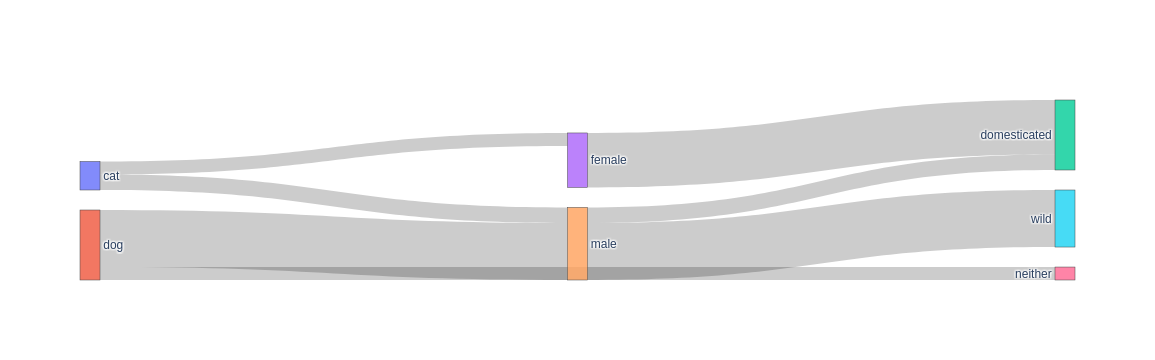

In [75]:
#####################################################
################### SANKEY PLOTS ####################
#####################################################
from pySankey.sankey import sankey
import pandas as pd
import plotly.graph_objects as go


#
label_list = ['cat', 'dog', 'domesticated', 'female', 'male', 'wild', 'neither']
# cat: 0, dog: 1, domesticated: 2, female: 3, male: 4, wild: 5
source = [0, 0, 1, 3, 4, 4, 1]
target = [3, 4, 4, 2, 2, 5, 6]
count = [5, 6, 22, 21, 6, 22, 5]

fig = go.Figure(data=[
    go.Sankey(
            node = {"label": label_list},
            link = {"source": source, 
                    "target": target, 
                    "value": count}
            )
])

fig.show()


Ca array:  (1027,)
ca stack:  (1027, 180) , vel:  (7430,)
rate_map:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
time_map:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  

<ipython-input-158-f2790c6d28e1>:29: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

<ipython-input-158-f2790c6d28e1>:19: RuntimeWarning:

invalid value encountered in divide



In [143]:
mAct = imgs[0] #% meam calcium, binned
mSpd = vels[0] #% mean speed, binned

print ("[ca]: ", mAct.shape)
print ("speed: ", mSpd.shape)

#% nBins = 100;
nBins = mAct.shape[1] #size(mAct,2)
print ("n bins: ", nBins)

#% occupancy
Pocc = 1./mSpd
print (Pocc)
#Pocc = Pocc/repmat(sum(Pocc,1),[nBins 1])

#
#% SI
for iB = 1:nBins
    si(iB,1) = Pocc(iB,1)*\
                    (mAct(iB,1)/nanmean(mAct(:,1),1))*\
                    log2(mAct(iB,1)/nanmean(mAct(:,1),1)) #% Skaggs
end

# #
# si = nansum(si,1);

SI=∑pi⋅λiλ⋅logλiλ,





(1027, 180)
(7430,)
180
[inf inf inf ... inf inf inf]


<ipython-input-143-e6d2dea4de7e>:12: RuntimeWarning:

divide by zero encountered in divide



In [129]:
print (imgs[0].shape)

(1027, 180)
